<a href="https://colab.research.google.com/github/emtiazahmedanik/Drowsiness-Detection-Using-Machine-Learning/blob/main/NEWdriver_drowsiness_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install keras==2.15.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 55.4 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.17.0 requires keras>=3.2.0, but you have keras 2.15.0 which is incompatible.


In [5]:
pip install tensorflow opencv-python


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 35.5 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0


In [6]:
pip install --upgrade keras

In [7]:
from tensorflow import keras

import cv2
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

## Create Label Variable

In [8]:
labels = os.listdir(r"/content/drive/MyDrive/Eye_Classification/data")

In [9]:
labels
#Show label and create labels variable

['Closed', 'yawn', 'no_yawn', 'Open']

## Show a random image

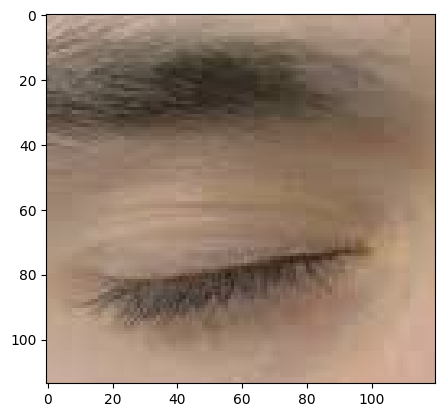

In [10]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread(r"/content/drive/MyDrive/Eye_Classification/data/Closed/_8.jpg"))

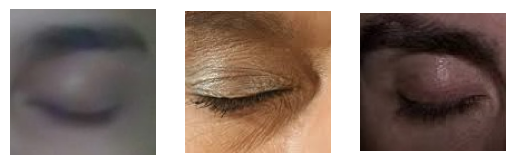

In [11]:


# Load and display multiple images
image_paths = [r"/content/drive/MyDrive/Eye_Classification/data/Closed/_3.jpg", r"/content/drive/MyDrive/Eye_Classification/data/Closed/_10.jpg",r"/content/drive/MyDrive/Eye_Classification/data/Closed/_20.jpg"]

num_images = len(image_paths)
fig, axes = plt.subplots(1, num_images)

for i, image_path in enumerate(image_paths):
    image = plt.imread(image_path)
    axes[i].imshow(image)
    axes[i].axis('off')

plt.show()

## Create a and show Image array

In [12]:
a = plt.imread(r"/content/drive/MyDrive/Eye_Classification/data/yawn/13.jpg")

## Image shape

In [13]:
a.shape

(480, 640, 3)

## Display the image of a yawning face without the background, using the array representation of the face image.


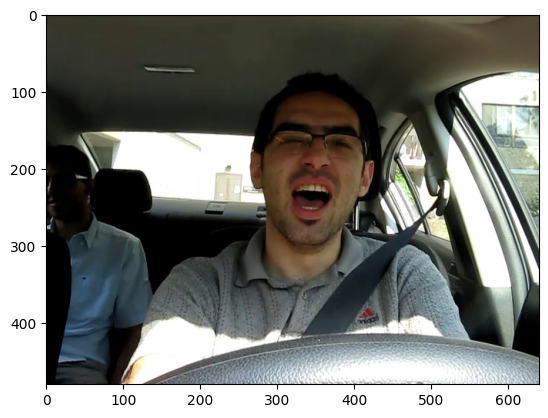

In [14]:
plt.imshow(plt.imread(r"/content/drive/MyDrive/Eye_Classification/data/yawn/89.jpg"))

## Extract only the face region from both yawn and not_yawn images.

In [15]:
def face_for_yawn(direc=r"/content/drive/MyDrive/Eye_Classification/data", face_cas_path=r"/content/drive/MyDrive/Eye_Classification/haarcascade/haarcascade_frontalface_default.xml"):
    yaw_no = []
    IMG_SIZE = 145
    categories = ["yawn", "no_yawn"]
    face_cascade = cv2.CascadeClassifier(face_cas_path)

    for category in categories:
        path_link = os.path.join(direc, category)
        class_num1 = categories.index(category)
        print(class_num1)
        for image in os.listdir(path_link):
            try:
                image_array = cv2.imread(os.path.join(path_link, image), cv2.IMREAD_COLOR)
                faces = face_cascade.detectMultiScale(image_array, 1.3, 5)
                for (x, y, w, h) in faces:
                    roi_color = image_array[y:y+h, x:x+w]
                    resized_array = cv2.resize(roi_color, (IMG_SIZE, IMG_SIZE))
                    yaw_no.append([resized_array, class_num1])
            except Exception as e:
                print(f"Error processing image {image}: {e}")

    return yaw_no

## For Closed and Open eye

In [16]:
def get_data(dir_path=r"/content/drive/MyDrive/Eye_Classification/data"):
    labels = ['Closed', 'Open']
    IMG_SIZE = 145
    data = []

    for label in labels:
        path = os.path.join(dir_path, label)
        class_num = labels.index(label) + 2
        print(class_num)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([resized_array, class_num])
            except Exception as e:
                print(f"Error processing image {img}: {e}")

    return data

## Expand the dataset by adding more data and convert the data into an array format.

In [17]:
def append_data():
    yaw_no = face_for_yawn()
    data = get_data()
    yaw_no.extend(data)

    # Ensure all images and labels are correctly formatted
    images = []
    labels = []

    for item in yaw_no:
        images.append(item[0])
        labels.append(item[1])

    return np.array(images), np.array(labels)

## New variable to store

In [18]:
new_images, new_labels = append_data()
print("Data shape:", new_images.shape, new_labels.shape)

0
1
2
3
Data shape: (1925, 145, 145, 3) (1925,)


## Separate the labels and features in the dataset

## Reshape images X

In [19]:
X = np.array(new_images)
X = X.reshape(-1, 145, 145, 3)

In [20]:
X.shape

(1925, 145, 145, 3)

## Perform label binarization.

In [21]:
from sklearn.preprocessing import LabelBinarizer
label_bin = LabelBinarizer()
y = label_bin.fit_transform(new_labels)

## Label array

In [22]:
y = np.array(y)

In [23]:
y

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       ...,
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1]])

## Train Test split

In [24]:
from sklearn.model_selection import train_test_split
seed = 42
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, test_size=test_size)

## Length of X_test

In [25]:
len(X_test)

578

## Import some dependencies

In [26]:
from tensorflow.python.keras.layers import Lambda, Dropout
from tensorflow.python.keras.layers.advanced_activations import ELU, LeakyReLU, ReLU
from tensorflow.python.keras import activations
from keras import callbacks, layers, metrics, regularizers
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from keras.layers import Conv2D, MaxPooling2D, Dropout, BatchNormalization, Activation,SimpleRNN
import cv2
import os
import numpy as np
import pandas as pd
import pickle


## Data Augmentation

In [27]:
train_generator = ImageDataGenerator(rescale=1/255, zoom_range=0.2, horizontal_flip=True, rotation_range=30)
test_generator = ImageDataGenerator(rescale=1/255)


#train_generator = tf.data.Dataset.from_tensor_slices((X_train, y_train))
#test_generator = tf.data.Dataset.from_tensor_slices((X_test, y_test))

train_generator = train_generator.flow(np.array(X_train), y_train, shuffle=False)
test_generator = test_generator.flow(np.array(X_test), y_test, shuffle=False)

# Build and train CNN model

In [28]:
model_CNN = keras.models.Sequential()

model_CNN.add(Conv2D(filters= 256, kernel_size=(3, 3), activation="relu", input_shape=(145,145,3)))
model_CNN.add(BatchNormalization())
model_CNN.add(MaxPooling2D(pool_size=(2, 2)))

model_CNN.add(Conv2D(filters= 128, kernel_size= (3, 3), activation="relu",kernel_initializer='he_normal'))
model_CNN.add(BatchNormalization())
model_CNN.add(MaxPooling2D(pool_size=(2, 2)))

model_CNN.add(Conv2D(filters= 64, kernel_size= (3, 3), activation="relu",kernel_initializer='he_normal'))
model_CNN.add(BatchNormalization())
model_CNN.add(MaxPooling2D(pool_size=(2, 2)))

model_CNN.add(Conv2D(filters= 32, kernel_size= (3, 3), activation="relu",kernel_initializer='he_normal'))
model_CNN.add(BatchNormalization())
model_CNN.add(MaxPooling2D(pool_size=(2, 2)))

model_CNN.add(keras.layers.Flatten())
model_CNN.add(BatchNormalization())
model_CNN.add(Dropout(0.5))

model_CNN.add(keras.layers.Dense(64, activation="relu"))
model_CNN.add(keras.layers.Dense(4, activation="softmax"))

model_CNN.build(input_shape=(None, 145, 145, 3))
model_CNN.summary()

model_CNN.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 143, 143, 256)       │           7,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 143, 143, 256)       │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 71, 71, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 69, 69, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 69, 69, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 34, 34, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 14, 14, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1568)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 1568)                │           6,272 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1568)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         100,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 503,332 (1.92 MB)

 Trainable params: 499,236 (1.90 MB)

 Non-trainable params: 4,096 (16.00 KB)

In [29]:
# Add Callback
# early_stopping = tf.keras.callbacks.EarlyStopping(
#     monitor='val_loss', mode='min', patience=5, verbose=1)
mcp_save = tf.keras.callbacks.ModelCheckpoint(
    '/content/drive/MyDrive/Eye_Classification/history_and_model/b_model_cnn.keras', save_best_only=True, monitor='val_loss', mode='min')
callbacks = [mcp_save]

In [30]:
history_CNN = model_CNN.fit(train_generator, epochs=50, validation_data=test_generator, shuffle=True, validation_steps=len(test_generator), callbacks=callbacks)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


43/43 ━━━━━━━━━━━━━━━━━━━━ 40s 517ms/step - accuracy: 0.6024 - loss: 1.1683 - val_accuracy: 0.6246 - val_loss: 0.9672
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 0.8115 - loss: 0.5486

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


43/43 ━━━━━━━━━━━━━━━━━━━━ 14s 179ms/step - accuracy: 0.8119 - loss: 0.5476
Epoch 3/50


/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/model_checkpoint.py:206: UserWarning: Can save best model only with val_loss available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 171ms/step - accuracy: 0.8417 - loss: 0.4242 - val_accuracy: 0.4602 - val_loss: 1.5858
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 13s 245ms/step - accuracy: 0.8411 - loss: 0.4199
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 8s 168ms/step - accuracy: 0.8710 - loss: 0.3283 - val_accuracy: 0.3806 - val_loss: 2.7273
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 159ms/step - accuracy: 0.8498 - loss: 0.3581
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 12s 198ms/step - accuracy: 0.8876 - loss: 0.2817 - val_accuracy: 0.7872 - val_loss: 0.6268
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 199ms/step - accuracy: 0.9190 - loss: 0.2318
Epoch 9/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 8s 173ms/step - accuracy: 0.9089 - loss: 0.2020 - val_accuracy: 0.8408 - val_loss: 0.4335
Epoch 10/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 203ms/step - accuracy: 0.9105 - loss: 0.2529
Epoch 11/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 8s 174ms/step - accuracy: 0.9163 - loss: 0.1989 - val_accuracy: 0.8910 - val_loss: 0.2792
Epoch 12/50
43/43 ━━

In [31]:
model_CNN.save('/content/drive/MyDrive/Eye_Classification/history_and_model/l_model_cnn.keras')
with open('/content/drive/MyDrive/Eye_Classification/history_and_model/history_CNN.pkl', 'wb') as file_pi:
    pickle.dump(history_CNN.history, file_pi)

# Build and train CNN-RNN model

In [32]:
import keras
from keras.layers import Conv2D, BatchNormalization, MaxPooling2D, SimpleRNN, Flatten, Dropout, Dense, Reshape

model_CNN_RNN = keras.models.Sequential()

# Initial Conv2D layer to extract initial spatial features
model_CNN_RNN.add(Conv2D(filters=256, kernel_size=(3, 3), activation="relu", input_shape=(145, 145, 3)))
model_CNN_RNN.add(BatchNormalization())
model_CNN_RNN.add(MaxPooling2D(pool_size=(2, 2)))

# Another Conv2D layer before transitioning to RNN
model_CNN_RNN.add(Conv2D(filters=128, kernel_size=(3, 3), activation="relu", kernel_initializer='he_normal'))
model_CNN_RNN.add(BatchNormalization())
model_CNN_RNN.add(MaxPooling2D(pool_size=(2, 2)))

# Reshape the output to be suitable for RNN input
model_CNN_RNN.add(Reshape((34, 34 * 128)))

# Adding SimpleRNN layers
model_CNN_RNN.add(SimpleRNN(64, activation='relu', return_sequences=True))
model_CNN_RNN.add(BatchNormalization())
model_CNN_RNN.add(SimpleRNN(32, activation='relu'))
model_CNN_RNN.add(BatchNormalization())

# Flatten and add Dense layers
model_CNN_RNN.add(Flatten())
model_CNN_RNN.add(BatchNormalization())
model_CNN_RNN.add(Dropout(0.5))

model_CNN_RNN.add(Dense(64, activation="relu"))
model_CNN_RNN.add(Dense(4, activation="softmax"))

model_CNN_RNN.build(input_shape=(None, 145, 145, 3))
model_CNN_RNN.summary()

model_CNN_RNN.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 143, 143, 256)       │           7,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 143, 143, 256)       │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 71, 71, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 69, 69, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 69, 69, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 34, 34, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 34, 4352)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ (None, 34, 64)              │         282,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 34, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 32)                  │           3,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 592,420 (2.26 MB)

 Trainable params: 591,396 (2.26 MB)

 Non-trainable params: 1,024 (4.00 KB)

In [33]:
# Add Callback
# early_stopping = tf.keras.callbacks.EarlyStopping(
#     monitor='val_loss', mode='min', patience=5, verbose=1)
mcp_save = tf.keras.callbacks.ModelCheckpoint(
    '/content/drive/MyDrive/Eye_Classification/history_and_model/b_model_cnn_rnn.keras', save_best_only=True, monitor='val_loss', mode='min')
callbacks = [mcp_save]

In [34]:
history_CNN_RNN = model_CNN_RNN.fit(train_generator, epochs=50, validation_data=test_generator, shuffle=True, validation_steps=len(test_generator), callbacks=callbacks)

Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 27s 382ms/step - accuracy: 0.2927 - loss: 1.6665 - val_accuracy: 0.3979 - val_loss: 1.1907
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 8s 160ms/step - accuracy: 0.4781 - loss: 1.1063
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 172ms/step - accuracy: 0.5437 - loss: 0.9328 - val_accuracy: 0.4273 - val_loss: 1.1579
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 182ms/step - accuracy: 0.5459 - loss: 0.9443
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 208ms/step - accuracy: 0.5389 - loss: 0.8981 - val_accuracy: 0.4343 - val_loss: 1.0926
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 194ms/step - accuracy: 0.5818 - loss: 0.8363
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 17s 325ms/step - accuracy: 0.6258 - loss: 0.7482 - val_accuracy: 0.4965 - val_loss: 1.0113
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 163ms/step - accuracy: 0.6383 - loss: 0.7202
Epoch 9/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 174ms/step - accuracy: 0.6025 - loss: 0.8362 - val_accuracy: 0.6176 - val_loss: 0.8378
Epoch 10

In [35]:
model_CNN_RNN.save('/content/drive/MyDrive/Eye_Classification/history_and_model/l_model_cnn_rnn.keras')
with open('/content/drive/MyDrive/Eye_Classification/history_and_model/history_CNN_RNN.pkl', 'wb') as file_pi:
    pickle.dump(history_CNN_RNN.history, file_pi)

# Comparision

In [36]:
from keras.models import load_model

best_model_CNN = load_model("/content/drive/MyDrive/Eye_Classification/history_and_model/b_model_cnn.keras")
best_model_CNN_RNN = load_model("/content/drive/MyDrive/Eye_Classification/history_and_model/b_model_cnn_rnn.keras")

history_path_CNN = "/content/drive/MyDrive/Eye_Classification/history_and_model/history_CNN.pkl"
history_path_CNN_RNN = "/content/drive/MyDrive/Eye_Classification/history_and_model/history_CNN_RNN.pkl"

with open(history_path_CNN, 'rb') as file:
    history_CNN = pickle.load(file)
with open(history_path_CNN_RNN, 'rb') as file:
    history_CNN_RNN = pickle.load(file)

## Comapare accuracy and loss on train and val set

Length of accuracy_CNN: 50
Length of val_accuracy_CNN: 25
Length of loss_CNN: 50
Length of val_loss_CNN: 25
Length of accuracy_CNN_RNN: 50
Length of val_accuracy_CNN_RNN: 25
Length of loss_CNN_RNN: 50
Length of val_loss_CNN_RNN: 25


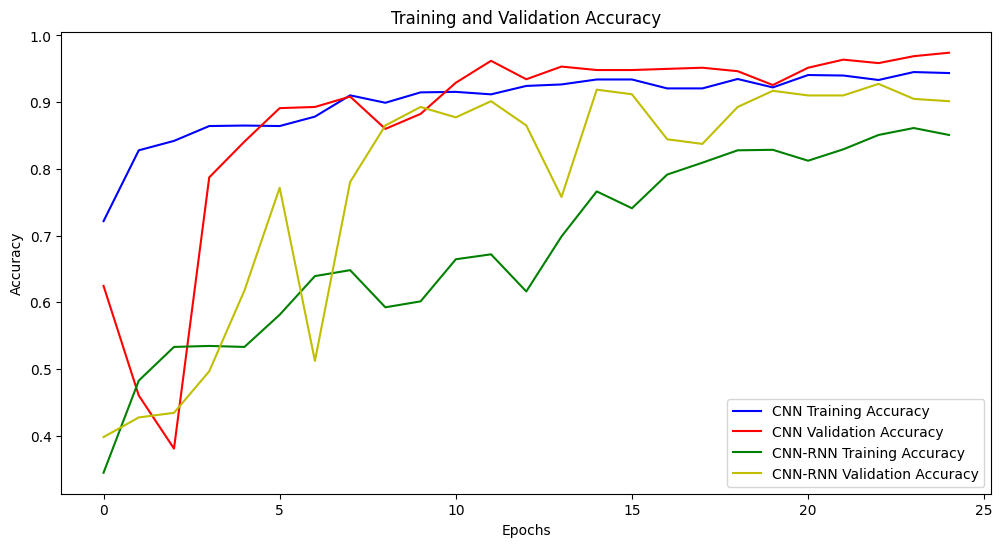

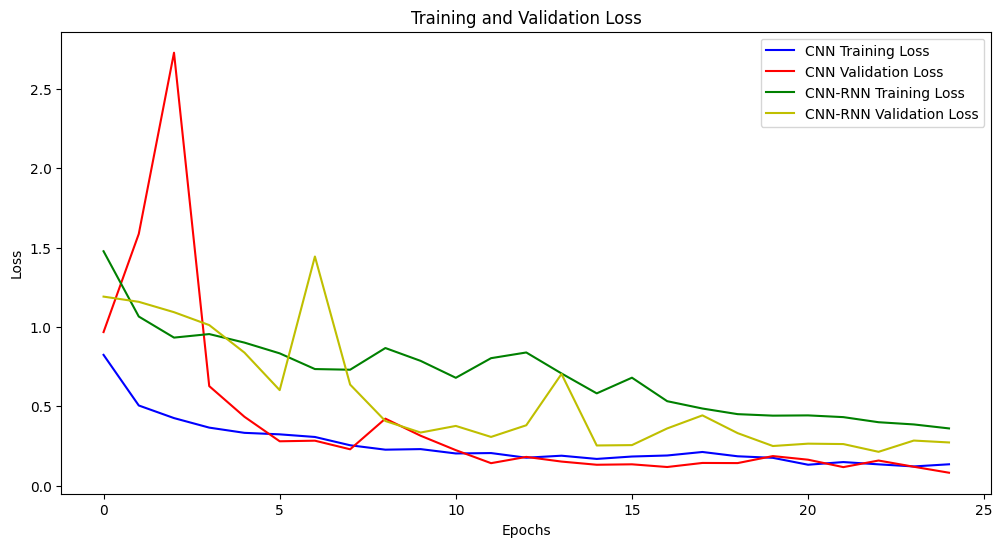

In [37]:
import matplotlib.pyplot as plt

# Extract metrics from history
accuracy_CNN = history_CNN['accuracy']
val_accuracy_CNN = history_CNN['val_accuracy']
loss_CNN = history_CNN['loss']
val_loss_CNN = history_CNN['val_loss']

accuracy_CNN_RNN = history_CNN_RNN['accuracy']
val_accuracy_CNN_RNN = history_CNN_RNN['val_accuracy']
loss_CNN_RNN = history_CNN_RNN['loss']
val_loss_CNN_RNN = history_CNN_RNN['val_loss']

# Debug prints for lengths
print(f"Length of accuracy_CNN: {len(accuracy_CNN)}")
print(f"Length of val_accuracy_CNN: {len(val_accuracy_CNN)}")
print(f"Length of loss_CNN: {len(loss_CNN)}")
print(f"Length of val_loss_CNN: {len(val_loss_CNN)}")

print(f"Length of accuracy_CNN_RNN: {len(accuracy_CNN_RNN)}")
print(f"Length of val_accuracy_CNN_RNN: {len(val_accuracy_CNN_RNN)}")
print(f"Length of loss_CNN_RNN: {len(loss_CNN_RNN)}")
print(f"Length of val_loss_CNN_RNN: {len(val_loss_CNN_RNN)}")

# Truncate CNN arrays to minimum length
min_len_CNN = min(len(accuracy_CNN), len(val_accuracy_CNN), len(loss_CNN), len(val_loss_CNN))
accuracy_CNN = accuracy_CNN[:min_len_CNN]
val_accuracy_CNN = val_accuracy_CNN[:min_len_CNN]
loss_CNN = loss_CNN[:min_len_CNN]
val_loss_CNN = val_loss_CNN[:min_len_CNN]

# Truncate CNN-RNN arrays to minimum length
min_len_CNN_RNN = min(len(accuracy_CNN_RNN), len(val_accuracy_CNN_RNN), len(loss_CNN_RNN), len(val_loss_CNN_RNN))
accuracy_CNN_RNN = accuracy_CNN_RNN[:min_len_CNN_RNN]
val_accuracy_CNN_RNN = val_accuracy_CNN_RNN[:min_len_CNN_RNN]
loss_CNN_RNN = loss_CNN_RNN[:min_len_CNN_RNN]
val_loss_CNN_RNN = val_loss_CNN_RNN[:min_len_CNN_RNN]

# Create epochs based on the truncated lengths
epochs_CNN = list(range(len(accuracy_CNN)))
epochs_CNN_RNN = list(range(len(accuracy_CNN_RNN)))

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(epochs_CNN, accuracy_CNN, "b", label="CNN Training Accuracy")
plt.plot(epochs_CNN, val_accuracy_CNN, "r", label="CNN Validation Accuracy")
plt.plot(epochs_CNN_RNN, accuracy_CNN_RNN, "g", label="CNN-RNN Training Accuracy")
plt.plot(epochs_CNN_RNN, val_accuracy_CNN_RNN, "y", label="CNN-RNN Validation Accuracy")
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(epochs_CNN, loss_CNN, "b", label="CNN Training Loss")
plt.plot(epochs_CNN, val_loss_CNN, "r", label="CNN Validation Loss")
plt.plot(epochs_CNN_RNN, loss_CNN_RNN, "g", label="CNN-RNN Training Loss")
plt.plot(epochs_CNN_RNN, val_loss_CNN_RNN, "y", label="CNN-RNN Validation Loss")
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# classification report

In [38]:
labels_new = ["yawn", "no_yawn", "Closed", "Open"]

In [39]:
# Make predictions
predictions_CNN = best_model_CNN.predict(X_test)
predictions_CNN_RNN = best_model_CNN_RNN.predict(X_test)

# Convert predictions to label indices
predicted_classes_CNN = np.argmax(predictions_CNN, axis=1)
predicted_classes_CNN_RNN = np.argmax(predictions_CNN_RNN, axis=1)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step


In [40]:
from sklearn.metrics import classification_report
# Classification report for CNN
print("Classification Report for CNN:\n")
report_CNN = classification_report(np.argmax(y_test, axis=1), predicted_classes_CNN, target_names=labels_new)
print(report_CNN)

# Classification report for CNN-RNN
print("Classification Report for CNN-RNN:\n")
report_CNN_RNN = classification_report(np.argmax(y_test, axis=1), predicted_classes_CNN_RNN, target_names=labels_new)
print(report_CNN_RNN)

Classification Report for CNN:

              precision    recall  f1-score   support

        yawn       0.12      1.00      0.21        63
     no_yawn       0.00      0.00      0.00        74
      Closed       0.00      0.00      0.00       215
        Open       1.00      0.20      0.34       226

    accuracy                           0.19       578
   macro avg       0.28      0.30      0.14       578
weighted avg       0.40      0.19      0.16       578

Classification Report for CNN-RNN:

              precision    recall  f1-score   support

        yawn       0.00      0.00      0.00        63
     no_yawn       0.00      0.00      0.00        74
      Closed       0.61      0.91      0.73       215
        Open       0.66      0.76      0.71       226

    accuracy                           0.63       578
   macro avg       0.32      0.42      0.36       578
weighted avg       0.49      0.63      0.55       578



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

## Confusion matrix

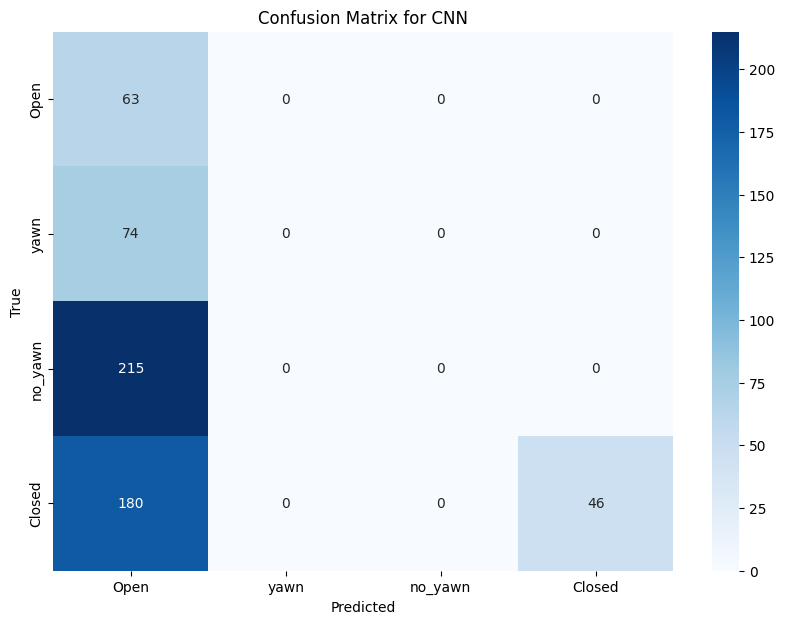

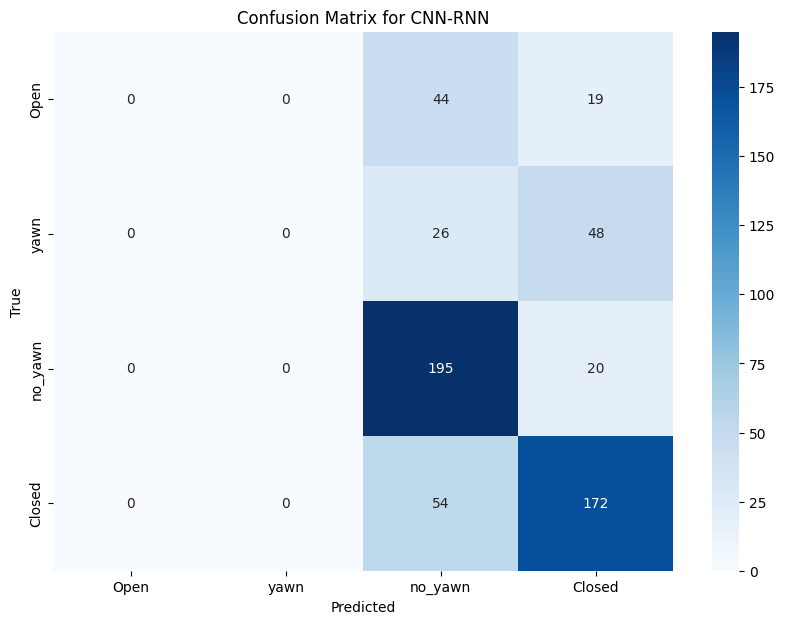

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrices
cm_CNN = confusion_matrix(np.argmax(y_test, axis=1), predicted_classes_CNN)
cm_CNN_RNN = confusion_matrix(np.argmax(y_test, axis=1), predicted_classes_CNN_RNN)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title, labels_new):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels_new, yticklabels=labels_new)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

# Define class labels
labels_new = [ "Open","yawn", "no_yawn", "Closed",]

# Plot confusion matrices
plot_confusion_matrix(cm_CNN, "Confusion Matrix for CNN", labels_new)
plot_confusion_matrix(cm_CNN_RNN, "Confusion Matrix for CNN-RNN", labels_new)


# predicting function

In [42]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define constants
IMG_SIZE = 145
BATCH_SIZE = 32
EPOCHS = 10
NUM_CLASSES = 4  # Assuming 4 classes: "yawn", "no_yawn", "Closed", "Open"

# Image data generator for training set
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load training and validation data
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Eye_Classification/data',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Eye_Classification/data',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(NUM_CLASSES, activation='softmax')  # 4 classes for the output
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    epochs=EPOCHS
)

# Save the trained model as a .h5 file
model.save("/content/drive/MyDrive/Eye_Classification/trainedmodel.keras")

print("Model saved as trainedmodel.keras")


Found 2321 images belonging to 4 classes.
Found 579 images belonging to 4 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


72/72 ━━━━━━━━━━━━━━━━━━━━ 25s 263ms/step - accuracy: 0.5750 - loss: 0.9165 - val_accuracy: 0.5729 - val_loss: 0.6777
Epoch 2/10
 1/72 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.6875 - loss: 0.5213

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


72/72 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - accuracy: 0.6875 - loss: 0.5213 - val_accuracy: 0.0000e+00 - val_loss: 1.1659
Epoch 3/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 16s 202ms/step - accuracy: 0.8011 - loss: 0.3989 - val_accuracy: 0.5642 - val_loss: 0.6740
Epoch 4/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9375 - loss: 0.2771 - val_accuracy: 0.6667 - val_loss: 0.4585
Epoch 5/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 15s 199ms/step - accuracy: 0.8688 - loss: 0.2809 - val_accuracy: 0.6024 - val_loss: 0.7270
Epoch 6/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 265us/step - accuracy: 0.9688 - loss: 0.1562 - val_accuracy: 1.0000 - val_loss: 0.3188
Epoch 7/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 21s 210ms/step - accuracy: 0.8590 - loss: 0.2814 - val_accuracy: 0.5851 - val_loss: 1.1258
Epoch 8/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 221us/step - accuracy: 0.9375 - loss: 0.1601 - val_accuracy: 0.3333 - val_loss: 1.3410
Epoch 9/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 15s 195ms/step - accuracy: 0.8826 - loss: 0.2467 - val_accuracy: 0.6024 

In [43]:
labels_new = ["yawn", "no_yawn", "Closed", "Open"]
IMG_SIZE = 145
def prepare(filepath, face_cas="../input/prediction-images/haarcascade_frontalface_default.xml"):
    try:
        img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
        img_array = img_array / 255
        resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        return resized_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)
    except Exception as e:
        print("Error occurred while reading the image file:", e)
        return None

model = tf.keras.models.load_model("/content/drive/MyDrive/Eye_Classification/trainedmodel.keras")
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# Prediction
## 0-yawn, 1-no_yawn, 2-Closed, 3-Open

In [44]:
import cv2
import os

def prepare(filepath, IMG_SIZE=145):
    try:
        # Check if the file exists
        if not os.path.exists(filepath):
            print(f"Error: File '{filepath}' not found.")
            return None

        # Load the image
        img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)

        # Ensure the image was read correctly
        if img_array is None:
            print(f"Error: Unable to read the image from '{filepath}'.")
            return None

        # Normalize the image (optional, depending on your model)
        img_array = img_array / 255.0

        # Resize the image
        resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))

        # Reshape it to fit the model's expected input
        return resized_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

    except Exception as e:
        print(f"Error occurred while processing the image '{filepath}': {e}")
        return None


In [45]:
prediction = model.predict([prepare(r"/content/drive/MyDrive/Eye_Classification/data/Closed/_106.jpg")])
np.argmax(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 677ms/step


0

In [46]:
prediction = model.predict([prepare(r"/content/drive/MyDrive/Eye_Classification/data/yawn/110.jpg")])
np.argmax(prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


2